In [126]:
import numpy as np
import pandas as pd

import seaborn as sns
%matplotlib inline

import os, sys, email

# For Plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set_style('whitegrid')


# For Network analysis
import networkx as nx
# NLP
from nltk.tokenize.regexp import RegexpTokenizer

In [127]:
data = pd.read_csv('enron_email_20_percent.csv')

C:\Users\MR124419\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (0,51) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [128]:
data.head()


,Unnamed: 0,Message-ID,Date,From,To,Subject,X-From,X-To,X-cc,X-bcc,...,Cat_10_level_1,Cat_10_level_2,Cat_10_weight,Cat_11_level_1,Cat_11_level_2,Cat_11_weight,Cat_12_level_1,Cat_12_level_2,Cat_12_weight,labeled
0,403470,<117238.1075846810566.JavaMail.evans@thyme>,2000-12-11 09:22:00,frozenset({'susan.scott@enron.com'}),frozenset({'alicia.perkins@enron.com'}),Re: Travel,Susan M Scott,Alicia Perkins,katyhester@hotmail.com,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1,130904,<12689165.1075853747639.JavaMail.evans@thyme>,2000-03-09 10:00:00,frozenset({'scott.goodell@enron.com'}),frozenset({'chris.germany@enron.com'}),Re: k#65403,Scott Goodell,Chris Germany,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2,217372,<12058190.1075856802090.JavaMail.evans@thyme>,2000-02-04 18:14:00,frozenset({'vince.kaminski@enron.com'}),frozenset({'vkaminski@aol.com'}),El Paso / ENA Deal Completely Terminated Now,Vince J Kaminski,vkaminski@aol.com,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
3,376779,<1251997.1075857131869.JavaMail.evans@thyme>,2000-11-01 12:34:00,frozenset({'benjamin.rogers@enron.com'}),frozenset({'patty.donahue@chase.com'}),Re: FW: winnie_t,Benjamin Rogers,"""Donahue, Patty"" <Patty.Donahue@Chase.com> @ E...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
4,63707,<23661622.1075843051592.JavaMail.evans@thyme>,2000-11-29 15:43:00,frozenset({'jeff.dasovich@enron.com'}),frozenset({'joseph.alamo@enron.com'}),Re: Address Information,Jeff Dasovich,Joseph Alamo,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103482 entries, 0 to 103481
Data columns (total 52 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      103482 non-null  object 
 1   Message-ID      103482 non-null  object 
 2   Date            103482 non-null  object 
 3   From            103482 non-null  object 
 4   To              99165 non-null   object 
 5   Subject         99656 non-null   object 
 6   X-From          103476 non-null  object 
 7   X-To            101679 non-null  object 
 8   X-cc            25663 non-null   object 
 9   X-bcc           39 non-null      object 
 10  X-Folder        103476 non-null  object 
 11  X-Origin        103476 non-null  object 
 12  X-FileName      102624 non-null  object 
 13  content         103246 non-null  object 
 14  user            103480 non-null  object 
 15  Cat_1_level_1   327 non-null     float64
 16  Cat_1_level_2   327 non-null     float64
 17  Cat_1_weig

In [130]:
data.drop(['Cat_1_level_1','Cat_2_level_1','Cat_3_level_1','Cat_4_level_1','Cat_5_level_1','Cat_6_level_1','Cat_7_level_1','Cat_8_level_1','Cat_9_level_1','Cat_10_level_1','Cat_11_level_1','Cat_12_level_1'], axis = 1 , inplace=True)

In [131]:
data.drop(['Cat_1_weight','Cat_2_weight','Cat_3_weight','Cat_4_weight','Cat_5_weight','Cat_6_weight','Cat_7_weight','Cat_8_weight','Cat_9_weight','Cat_10_weight','Cat_11_weight','Cat_12_weight'],axis=1,inplace=True)

In [132]:
data.drop(['Cat_2_level_2','Cat_4_level_2','Cat_6_level_2','Cat_8_level_2','Cat_10_level_2','Cat_12_level_2'],axis=1,inplace=True)

In [133]:
data.drop(['Cat_1_level_2','Cat_3_level_2','Cat_5_level_2','Cat_7_level_2','Cat_9_level_2','Cat_11_level_2'],axis=1,inplace=True)

<AxesSubplot:>

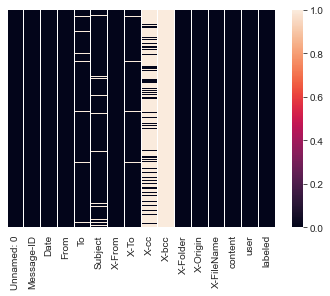

In [134]:
sns.heatmap(data.isnull(),yticklabels=False)

In [135]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103482 entries, 0 to 103481
Data columns (total 16 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  103482 non-null  object
 1   Message-ID  103482 non-null  object
 2   Date        103482 non-null  object
 3   From        103482 non-null  object
 4   To          99165 non-null   object
 5   Subject     99656 non-null   object
 6   X-From      103476 non-null  object
 7   X-To        101679 non-null  object
 8   X-cc        25663 non-null   object
 9   X-bcc       39 non-null      object
 10  X-Folder    103476 non-null  object
 11  X-Origin    103476 non-null  object
 12  X-FileName  102624 non-null  object
 13  content     103246 non-null  object
 14  user        103480 non-null  object
 15  labeled     103480 non-null  object
dtypes: object(16)
memory usage: 12.6+ MB


In [136]:
#Creating from_user list

userList = []
userList = data['user'].unique()

In [137]:
#Number of emails sent by each users
count = []
counter = 0 
for l in userList:
    for user in data['user']:
        if user == l:
            counter += 1
    count.append(counter)
    counter = 0

[(5695, 'kaminski-v'), (5628, 'dasovich-j'), (5011, 'kean-s'), (4825, 'mann-k'), (4085, 'jones-t'), (3737, 'shackleton-s'), (2787, 'taylor-m'), (2582, 'farmer-d'), (2506, 'germany-c'), (2346, 'beck-s'), (2218, 'symes-k'), (2048, 'nemec-g'), (1640, 'scott-s'), (1604, 'rogers-b'), (1586, 'bass-e'), (1465, 'sanders-r'), (1350, 'campbell-l'), (1203, 'guzman-m'), (1198, 'lay-k'), (1194, 'lenhart-m')]


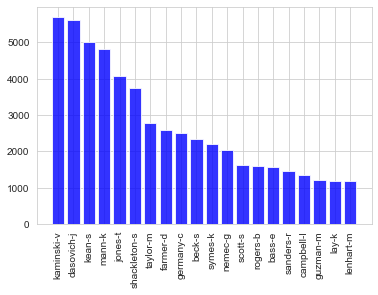

In [138]:
'''a look at how many email were sent by each user. 
 plotting top 20 users who sent the highest number of emails.'''

new_list = sorted(list(zip(count, userList)), reverse = True)[:20]   ##merge both lists and sort top 20, 
print(new_list)
num, mailer = zip(*new_list)  ## separate lists previously merged and use them for plotting
mail = range(len(new_list))
plt.bar(mail, num, align = 'center', color ='blue', alpha=0.8)
plt.xticks(mail, mailer, rotation='vertical')
plt.show()

In [139]:
print('shape of the dataframe:', data.shape)
# Find number of unique values in each columns
for col in data.columns:
    print(col, data[col].nunique())

shape of the dataframe: (103482, 16)
Unnamed: 0 103481
Message-ID 103481
Date 78689
From 10335
To 25514
Subject 63420
X-From 13296
X-To 31930
X-cc 13677
X-bcc 37
X-Folder 3840
X-Origin 257
X-FileName 421
content 83164
user 150
labeled 2


In [141]:
#data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
#data['Date'] = data['Date'].dt.strftime('%m/%d')

#data['Date'] = pd.to_datetime(data['Date'])

data['Date'] = pd.to_datetime(data['Date'], errors='coerce')


Text(0, 0.5, 'N emails')

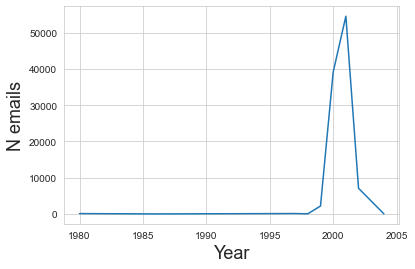

In [142]:
#When do people send emails?
"""ax = data.groupby(data['Date'].dt.year)['content'].count().plot()
ax.set_xlabel('Year', fontsize=18)
ax.set_ylabel('No of emails', fontsize=18)
"""


ax = data.groupby(data['Date'].dt.year)['content'].count().plot()
ax.set_xlabel('Year', fontsize=18)
ax.set_ylabel('N emails', fontsize=18)

Text(0, 0.5, 'No of mails')

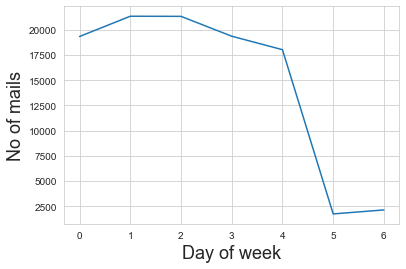

In [143]:
ax = data.groupby(data['Date'].dt.dayofweek)['content'].count().plot()
ax.set_xlabel('Day of week', fontsize=18)
ax.set_ylabel('No of mails', fontsize=18)

Text(0, 0.5, 'No of emails')

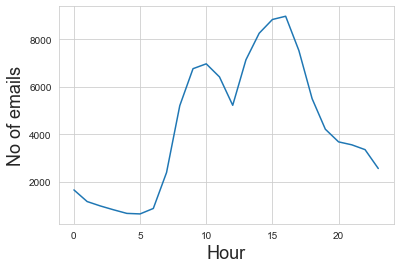

In [144]:
ax = data.groupby(data['Date'].dt.hour)['content'].count().plot()
ax.set_xlabel('Hour', fontsize=18)
ax.set_ylabel('No of emails', fontsize=18)